# EDA on world happiness report 2021

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn 
import plotly.graph_objs as go
import plotly.express as px

C:\Temp\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Temp\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Temp\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


### Reading the dataset and customizing according to the needs

Here I haved dropped the columns of the imaginary land called dystopia(taken for refenrence). I would be focusing on the real world data. I have changed columns name to make it easy to understand.<br>
Changed column names:-<br>
Country name:- Country<br>
Regional indicator:- Region<br> 
Ladder score:- Score<br>
Logged GDP per capita:- GDP(log)<br>
Freedom to make life choices:- Freedom<br>
Perceptions of corruption:- Corruption<br>
Healthy life expectancy:- Health<br>
Social support:- Support

In [2]:
df = pd.read_csv('report.csv')
df = df.iloc[:,0:12]
df = df.drop(columns=['Standard error of ladder score','upperwhisker','lowerwhisker'],axis=1)
df = df.rename(columns = {'Country name':'Country',
                          'Regional indicator': 'Region', 
                          'Ladder score': 'Score',
                          'Logged GDP per capita':'GDP(log)',
                          'Freedom to make life choices':'Freedom',
                          'Perceptions of corruption':'Corruption',
                          'Healthy life expectancy':'Health',
                          'Social support':'Support'})
df.head()

,Country,Region,Score,GDP(log),Support,Health,Freedom,Generosity,Corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [3]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in our data")

There are 149 rows and 9 columns in our data


In [4]:
#Checking if there are any null values
df.isnull().sum()

Country       0
Region        0
Score         0
GDP(log)      0
Support       0
Health        0
Freedom       0
Generosity    0
Corruption    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     149 non-null    object 
 1   Region      149 non-null    object 
 2   Score       149 non-null    float64
 3   GDP(log)    149 non-null    float64
 4   Support     149 non-null    float64
 5   Health      149 non-null    float64
 6   Freedom     149 non-null    float64
 7   Generosity  149 non-null    float64
 8   Corruption  149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


In [6]:
df.describe()

,Score,GDP(log),Support,Health,Freedom,Generosity,Corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


### Plotting correlation matrix

<AxesSubplot:>

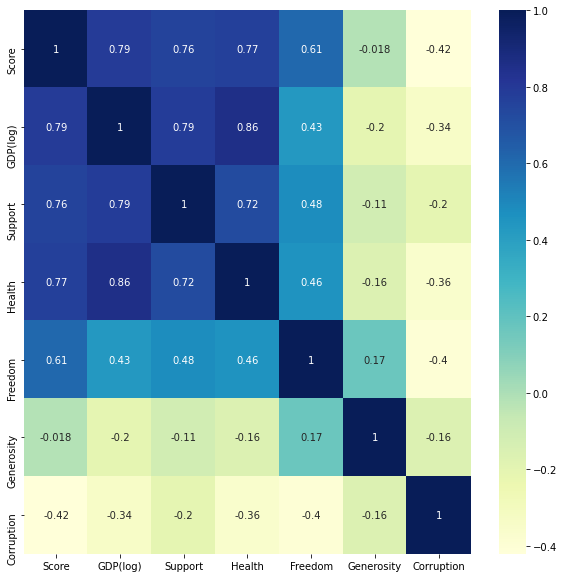

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sbn.heatmap(df.corr(), cmap="YlGnBu", annot=True,ax=ax)

### Checking how many unique regions are there

In [8]:
print('Regions:')
for i in df['Region'].unique():
    print(i)
print('\nNumber of regions:',df['Region'].nunique())

Regions:
Western Europe
North America and ANZ
Middle East and North Africa
Latin America and Caribbean
Central and Eastern Europe
East Asia
Southeast Asia
Commonwealth of Independent States
Sub-Saharan Africa
South Asia

Number of regions: 10


### How many number of countries are there in a region

In [9]:
df.groupby('Region')[['Country']].nunique()

,Country
Region,
Central and Eastern Europe,17
Commonwealth of Independent States,12
East Asia,6
Latin America and Caribbean,20
Middle East and North Africa,17
North America and ANZ,4
South Asia,7
Southeast Asia,9
Sub-Saharan Africa,36


### Checking distribution of different columns

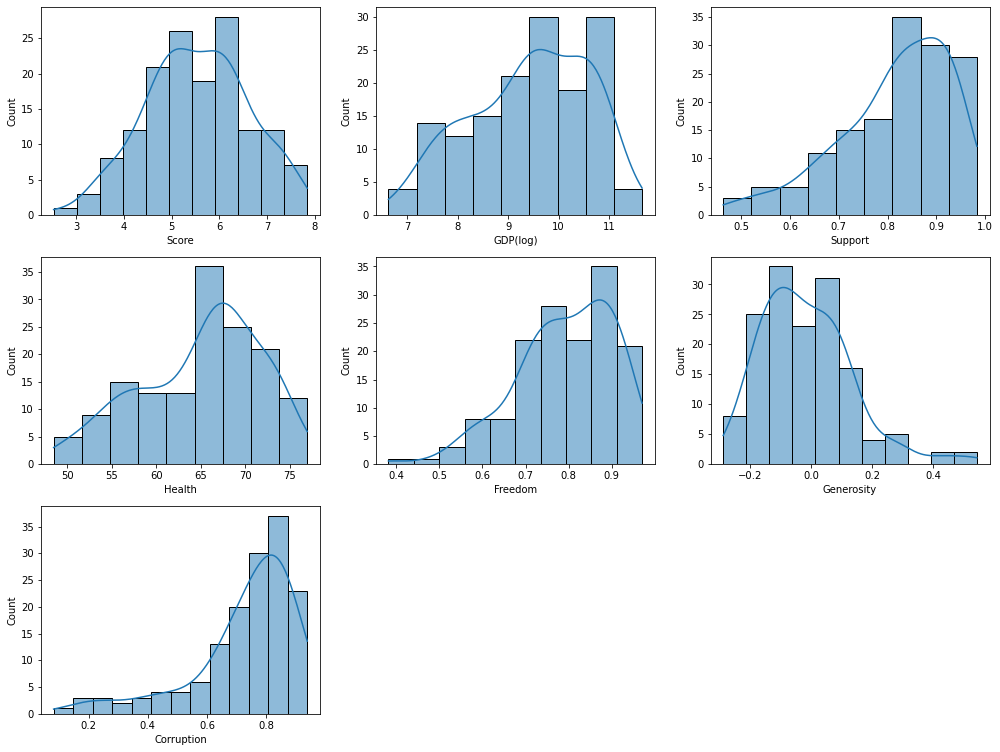

In [10]:
fig, ax = plt.subplots(3,3,figsize=(17,13))

sbn.histplot(df.Score,kde=True,ax=ax[0,0])

sbn.histplot(df['GDP(log)'],kde=True,ax=ax[0,1])

sbn.histplot(df.Support,kde=True,ax=ax[0,2])

sbn.histplot(df.Health,kde=True,ax=ax[1,0])

sbn.histplot(df.Freedom,kde=True,ax=ax[1,1])

sbn.histplot(df.Generosity,kde=True,ax=ax[1,2])

sbn.histplot(df.Corruption,kde=True,ax=ax[2,0])

fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

### Checking score for any country

In [11]:
def score(Country_name):
    for i in range(len(df['Country'])):
        if df['Country'].iloc[i] == Country_name:
            print(df['Score'][i])

name = input('Give the country name you want to get the score of: ')
score(name)

Give the country name you want to get the score of: India
3.819


### Getting the top 5 and bottom 5 countries based on their Happiness score i.e. Score

In [12]:
# Top 5

top = df.sort_values(by='Score',ascending=False)
top.head()

,Country,Region,Score,GDP(log),Support,Health,Freedom,Generosity,Corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [13]:
# Bottom 5
bottom = df.sort_values(by='Score',ascending=False)
bottom.tail()

,Country,Region,Score,GDP(log),Support,Health,Freedom,Generosity,Corruption
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


### Happiness Score based on the Region

In [14]:
data = df.groupby('Region')[['Score']].sum()
data

,Score
Region,
Central and Eastern Europe,101.741
Commonwealth of Independent States,65.604
East Asia,34.862
Latin America and Caribbean,118.161
Middle East and North Africa,88.736
North America and ANZ,28.514
South Asia,31.093
Southeast Asia,48.668
Sub-Saharan Africa,161.801


### GDP vs Score

In [ ]:
px.scatter(df, x='GDP(log)', y='Score',
           animation_frame='Region',
           animation_group='Country',
           color='Country', hover_name='Country',
           trendline= 'ols')

### Support vs Score

In [ ]:
px.scatter(df, x='Support', y='Score',
           animation_frame='Region',
           animation_group='Country',
           color='Country', hover_name='Country',
           trendline= 'ols')

### Health vs Score

In [ ]:
px.scatter(df, x='Health', y='Score',
           animation_frame='Region',
           animation_group='Country',
           color='Country', hover_name='Country',
           trendline= 'ols')

### Freedom vs Score

In [ ]:
px.scatter(df, x='Freedom', y='Score',
           animation_frame='Region',
           animation_group='Country',
           color='Country', hover_name='Country',
           trendline= 'ols')

### Generosity vs Score

In [ ]:
px.scatter(df, x='Generosity', y='Score',
           animation_frame='Region',
           animation_group='Country',
           color='Country', hover_name='Country',
           trendline= 'ols')

### Corruption vs Score

In [ ]:
px.scatter(df, x='Corruption', y='Score',
           animation_frame='Region',
           animation_group='Country',
           color='Country', hover_name='Country',
           trendline= 'ols')

### Seeing which feature is important to have high happiness score among top 10 countries

Text(0.5, 1.0, 'Happiness Score of the top 10 Countries')

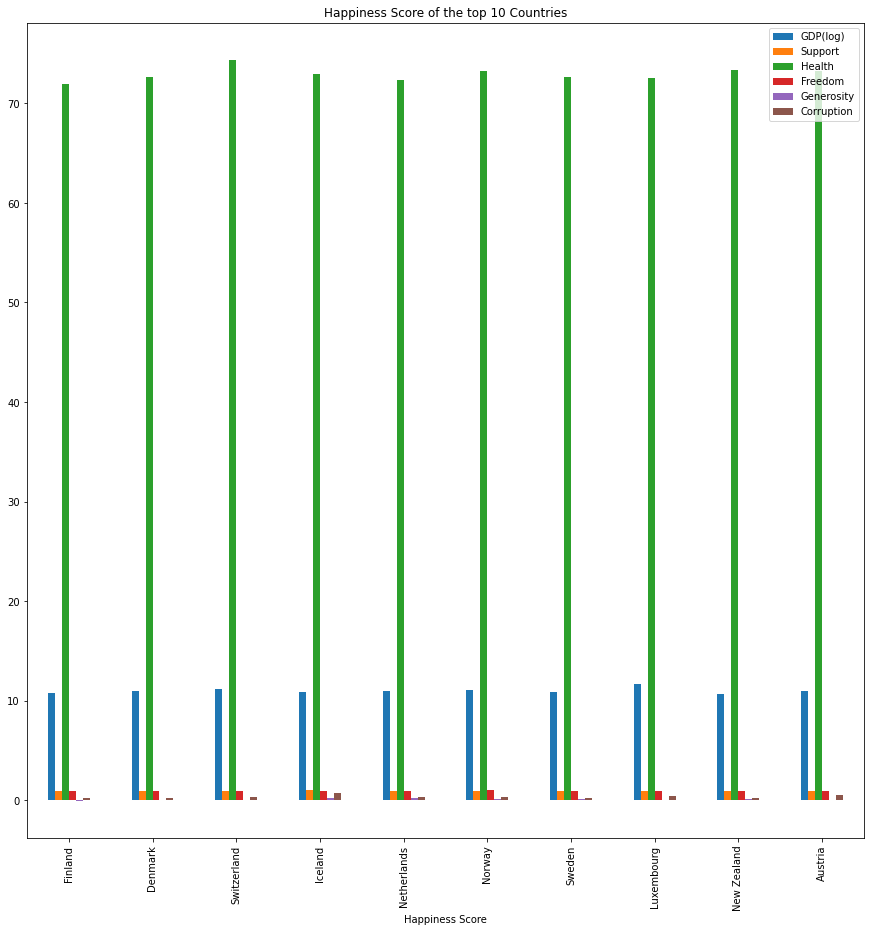

In [15]:
df.sort_values(by='Score',ascending=False).head(10).plot(x = 'Country',y=['Region','GDP(log)','Support','Health','Freedom','Generosity','Corruption'],kind='bar', figsize= (15, 15))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')

It is clearly visible as the country where Health(Actually Healthy life expectancy) is high has a more happiness score. One more thing which is can be considered here is that the country where people take good care of their health in the current scenario of covid-19 the country's happiness score is high. The second most considerable feature is GDP.